### ==============================================================
# ChatGPT Review Analysis
### ==============================================================

## 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

## 2. Load Dataset

In [3]:
df = pd.read_csv("chatgpt_reviews (1).csv")

print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
                              Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

           Review Date  
0  2024-08-23 19:30:05  
1  2024-08-23 19:28:18  
2  2024-08-23 19:22:59  
3  2024-08-23 19:20:50  
4  2024-08-23 19:20:39  


## 3. Data Cleaning & Preparation

In [5]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Handle missing values
df['review'] = df['review'].fillna("")

# Convert rating to numeric
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    196727 non-null  object
 1   review       196727 non-null  object
 2   ratings      196727 non-null  int64 
 3   review_date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB
None


## Create Sentiment (Rating Based)

In [10]:
def sentiment_from_rating(r):
    if r >= 4:
        return "positive"
    elif r == 3:
        return "neutral"
    else:
        return "negative"

df['sentiment'] = df['ratings'].apply(sentiment_from_rating)

df[['ratings', 'sentiment']].head()

,ratings,sentiment
0,5,positive
1,5,positive
2,5,positive
3,5,positive
4,5,positive


## 4. Sentiment Distribution Visualization

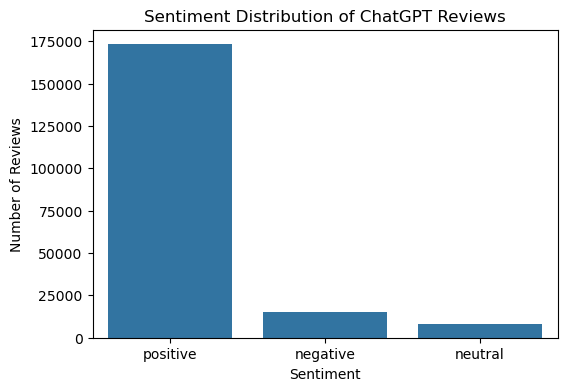

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution of ChatGPT Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

## 5. Rating Distribution (User Satisfaction)

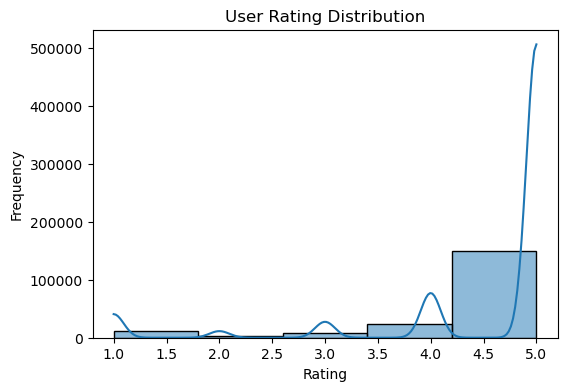

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['ratings'], bins=5, kde=True)
plt.title("User Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## 6. Sentiment vs Rating Analysis

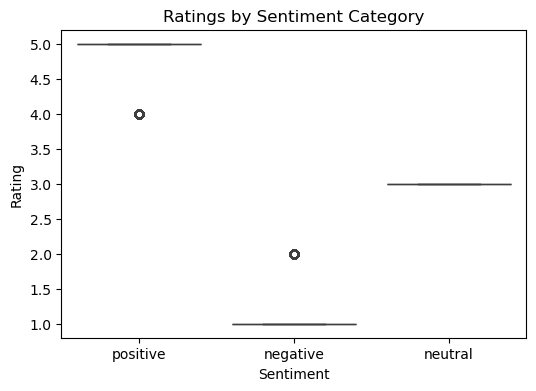

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='ratings', data=df)
plt.title("Ratings by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

## 7. Subjectivity Distribution

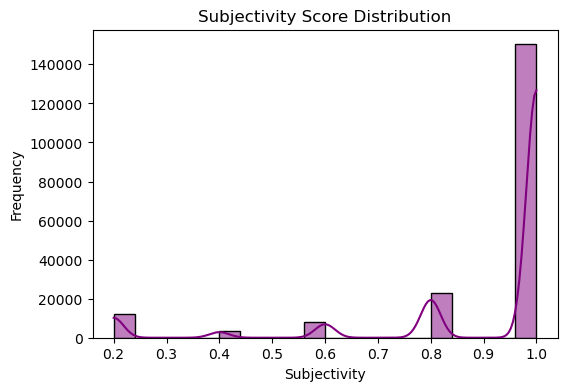

In [63]:
df['subjectivity'] = df['ratings'] / 5
plt.figure(figsize=(6,4))
sns.histplot(df['subjectivity'], bins=20, kde=True,color='purple',edgecolor='black')
plt.title("Subjectivity Score Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

## 8. Positive Review Keyword Extraction

In [34]:
# Filter positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['review']

# Clean and tokenize text
words = []
for review in positive_reviews:
    review = re.sub(r'[^a-zA-Z ]', '', review.lower())
    words.extend(review.split())

# Remove stopwords
stopwords = set(['the','is','and','to','of','a','in','for','it','on','with'])
filtered_words = [w for w in words if w not in stopwords and len(w) > 2]

# Top keywords
word_freq = Counter(filtered_words).most_common(10)
word_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

print("\nTop Positive Keywords:")
print(word_df)


Top Positive Keywords:
      Word  Frequency
0      app      44348
1     good      35700
2     very      34107
3     this      25687
4      its      20131
5     best      17893
6     nice      12921
7      you      12303
8    great      11277
9  helpful      11162


## 9. Positive Keyword Frequency Visualization

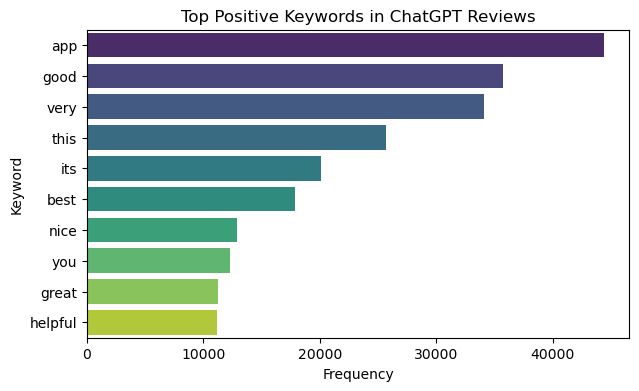

In [61]:
plt.figure(figsize=(7,4))
sns.barplot(x='Frequency', y='Word',hue='Word',data=word_df,palette='viridis',legend=False)
plt.title("Top Positive Keywords in ChatGPT Reviews")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

## 10. Word Cloud for Positive Reviews

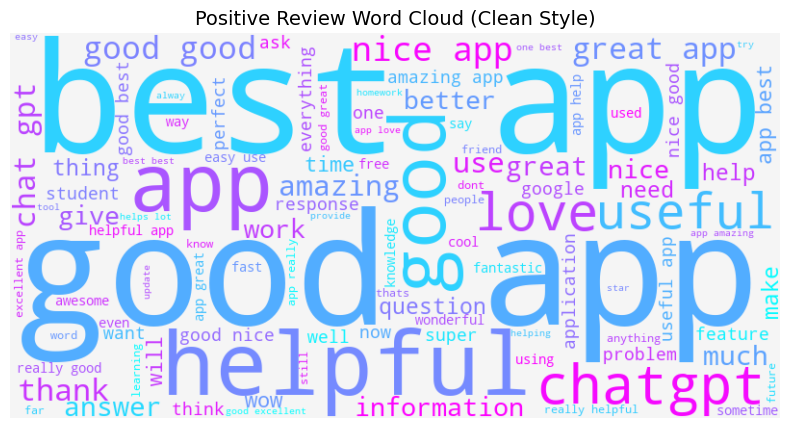

In [56]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='#f5f5f5',
    colormap='cool',
    max_words=100,
    font_step=2
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Review Word Cloud (Clean Style)", fontsize=14)
plt.show()

## 11. Final Insights

In [44]:
print("\nFinal Insights:")
print("• Majority of users show positive sentiment toward ChatGPT.")
print("• Higher ratings strongly align with positive sentiment.")
print("• Reviews are mostly subjective, reflecting personal experience.")
print("• Users frequently praise helpfulness, accuracy, and ease of use.")


Final Insights:
• Majority of users show positive sentiment toward ChatGPT.
• Higher ratings strongly align with positive sentiment.
• Reviews are mostly subjective, reflecting personal experience.
• Users frequently praise helpfulness, accuracy, and ease of use.
